In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### original data preparation and exploration

In [2]:
# Load the dataset
data = pd.read_csv("22079694.csv")

Check for missing values

In [3]:
missing_values = data.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_values)

Missing Values:
 Ask_Price_Level_1      0
Ask_Volume_Level_1     0
Bid_Price_Level_6      0
Bid_Volume_Level_6     0
Ask_Price_Level_7      0
Ask_Volume_Level_7     0
Bid_Price_Level_7      0
Bid_Volume_Level_7     0
Ask_Price_Level_8      0
Ask_Volume_Level_8     0
Bid_Price_Level_8      0
Bid_Volume_Level_8     0
Ask_Price_Level_9      0
Ask_Volume_Level_9     0
Bid_Price_Level_9      0
Bid_Volume_Level_9     0
Ask_Price_Level_10     0
Ask_Volume_Level_10    0
Bid_Price_Level_10     0
Ask_Volume_Level_6     0
Ask_Price_Level_6      0
Bid_Volume_Level_5     0
Ask_Volume_Level_3     0
Bid_Price_Level_1      0
Bid_Volume_Level_1     0
Ask_Price_Level_2      0
Ask_Volume_Level_2     0
Bid_Price_Level_2      0
Bid_Volume_Level_2     0
Ask_Price_Level_3      0
Bid_Price_Level_3      0
Bid_Price_Level_5      0
Bid_Volume_Level_3     0
Ask_Price_Level_4      0
Ask_Volume_Level_4     0
Bid_Price_Level_4      0
Bid_Volume_Level_4     0
Ask_Price_Level_5      0
Ask_Volume_Level_5     0
Bid_Volu

Check for outliers

In [4]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
outliers = ((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).sum().sort_values(ascending=False)
print("Outliers:\n", outliers)

Outliers:
 Bid_Volume_Level_8     108
Bid_Volume_Level_7     107
Ask_Volume_Level_8     103
Bid_Volume_Level_10     98
Ask_Volume_Level_9      97
Ask_Volume_Level_10     93
Ask_Volume_Level_1      92
Bid_Volume_Level_9      90
Bid_Volume_Level_1      89
Ask_Volume_Level_5      88
Ask_Volume_Level_7      88
Bid_Volume_Level_4      86
Ask_Volume_Level_6      86
Ask_Volume_Level_3      84
Ask_Volume_Level_2      84
Bid_Volume_Level_6      84
Ask_Volume_Level_4      83
Bid_Volume_Level_3      79
Bid_Volume_Level_5      76
Bid_Volume_Level_2      66
Bid_Price_Level_9        0
Ask_Price_Level_9        0
Ask_Price_Level_10       0
Bid_Price_Level_8        0
Bid_Price_Level_10       0
Ask_Price_Level_8        0
Ask_Price_Level_1        0
Bid_Price_Level_7        0
Ask_Price_Level_7        0
Bid_Price_Level_6        0
Bid_Price_Level_5        0
Ask_Price_Level_5        0
Bid_Price_Level_4        0
Ask_Price_Level_4        0
Bid_Price_Level_3        0
Ask_Price_Level_3        0
Bid_Price_Level_2

characterize the statistical properties

In [5]:
# Basic statistics of the data
data.describe()

,Ask_Price_Level_1,Ask_Volume_Level_1,Bid_Price_Level_1,Bid_Volume_Level_1,Ask_Price_Level_2,Ask_Volume_Level_2,Bid_Price_Level_2,Bid_Volume_Level_2,Ask_Price_Level_3,Ask_Volume_Level_3,...,Bid_Price_Level_8,Bid_Volume_Level_8,Ask_Price_Level_9,Ask_Volume_Level_9,Bid_Price_Level_9,Bid_Volume_Level_9,Ask_Price_Level_10,Ask_Volume_Level_10,Bid_Price_Level_10,Bid_Volume_Level_10
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,...,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,393.001317,1410.838889,392.945739,1711.053889,393.015978,1370.511667,392.930856,1331.560000,393.028489,1276.397222,...,392.861239,1528.718889,393.098906,1498.776111,392.850139,1471.086111,393.110489,1532.004444,392.838867,1529.167222
std,4.176542,1314.610019,4.186703,6558.821763,4.175316,1189.514885,4.188435,1832.728003,4.174302,821.168783,...,4.192113,1629.097294,4.169782,1621.646411,4.192634,1277.116585,4.169116,1359.408457,4.193058,1406.091158
min,385.740000,157.000000,385.720000,178.000000,385.770000,263.000000,385.650000,38.000000,385.780000,208.000000,...,385.580000,149.000000,385.850000,358.000000,385.570000,10.000000,385.860000,348.000000,385.560000,248.000000
25%,389.220000,978.000000,389.157500,928.000000,389.230000,962.750000,389.137500,905.750000,389.240000,927.750000,...,389.047500,989.000000,389.320000,1012.000000,389.037500,976.750000,389.330000,1045.750000,389.027500,994.000000
50%,393.180000,1217.500000,393.135000,1183.000000,393.200000,1187.000000,393.120000,1163.000000,393.210000,1147.000000,...,393.055000,1261.000000,393.275000,1254.000000,393.045000,1264.000000,393.285000,1309.500000,393.035000,1290.500000
75%,397.112500,1504.250000,397.052500,1473.000000,397.122500,1470.000000,397.042500,1475.000000,397.132500,1414.000000,...,396.982500,1601.000000,397.192500,1572.500000,396.972500,1624.250000,397.202500,1668.250000,396.962500,1668.250000
max,399.780000,22048.000000,399.740000,186972.000000,399.790000,21653.000000,399.730000,67702.000000,399.800000,15540.000000,...,399.670000,35329.000000,399.860000,37642.000000,399.660000,30731.000000,399.870000,32151.000000,399.650000,35663.000000


In this table, the mean ask price ranges from 393.001317 (Level 1) to 393.110489 (Level 10), while the mean bid price ranges from 392.838867 (Level 10) to 392.945739 (Level 1). The standard deviation of ask and bid prices is around 4.1 to 4.2 across all levels.

The mean ask volume ranges from 1410.838889 (Level 1) to 1532.004444 (Level 10), and the mean bid volume ranges from 1471.086111 (Level 9) to 1711.053889 (Level 1). The standard deviation of volumes varies significantly across levels, with bid volumes having a higher deviation.

In [6]:
# Calculate the summary statistics
description = data.describe()

# Calculate the skewness and kurtosis
skewness = data.skew()
kurtosis = data.kurtosis()

# Transpose the description DataFrame
description_T = description.transpose()

# Add skewness and kurtosis to the transposed DataFrame
description_T['skewness'] = skewness
description_T['kurtosis'] = kurtosis

# Transpose the DataFrame back to its original format
final_description = description_T.transpose()

# Display the final DataFrame with skewness and kurtosis
final_description

,Ask_Price_Level_1,Ask_Volume_Level_1,Bid_Price_Level_1,Bid_Volume_Level_1,Ask_Price_Level_2,Ask_Volume_Level_2,Bid_Price_Level_2,Bid_Volume_Level_2,Ask_Price_Level_3,Ask_Volume_Level_3,...,Bid_Price_Level_8,Bid_Volume_Level_8,Ask_Price_Level_9,Ask_Volume_Level_9,Bid_Price_Level_9,Bid_Volume_Level_9,Ask_Price_Level_10,Ask_Volume_Level_10,Bid_Price_Level_10,Bid_Volume_Level_10
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,...,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,393.001317,1410.838889,392.945739,1711.053889,393.015978,1370.511667,392.930856,1331.560000,393.028489,1276.397222,...,392.861239,1528.718889,393.098906,1498.776111,392.850139,1471.086111,393.110489,1532.004444,392.838867,1529.167222
std,4.176542,1314.610019,4.186703,6558.821763,4.175316,1189.514885,4.188435,1832.728003,4.174302,821.168783,...,4.192113,1629.097294,4.169782,1621.646411,4.192634,1277.116585,4.169116,1359.408457,4.193058,1406.091158
min,385.740000,157.000000,385.720000,178.000000,385.770000,263.000000,385.650000,38.000000,385.780000,208.000000,...,385.580000,149.000000,385.850000,358.000000,385.570000,10.000000,385.860000,348.000000,385.560000,248.000000
25%,389.220000,978.000000,389.157500,928.000000,389.230000,962.750000,389.137500,905.750000,389.240000,927.750000,...,389.047500,989.000000,389.320000,1012.000000,389.037500,976.750000,389.330000,1045.750000,389.027500,994.000000
50%,393.180000,1217.500000,393.135000,1183.000000,393.200000,1187.000000,393.120000,1163.000000,393.210000,1147.000000,...,393.055000,1261.000000,393.275000,1254.000000,393.045000,1264.000000,393.285000,1309.500000,393.035000,1290.500000
75%,397.112500,1504.250000,397.052500,1473.000000,397.122500,1470.000000,397.042500,1475.000000,397.132500,1414.000000,...,396.982500,1601.000000,397.192500,1572.500000,396.972500,1624.250000,397.202500,1668.250000,396.962500,1668.250000
max,399.780000,22048.000000,399.740000,186972.000000,399.790000,21653.000000,399.730000,67702.000000,399.800000,15540.000000,...,399.670000,35329.000000,399.860000,37642.000000,399.660000,30731.000000,399.870000,32151.000000,399.650000,35663.000000
skewness,-0.071499,9.355925,-0.072969,22.806542,-0.071274,9.359303,-0.073245,27.780827,-0.071132,8.664914,...,-0.073822,9.995551,-0.070692,11.868935,-0.073912,10.393365,-0.070646,10.982312,-0.073991,11.185491
kurtosis,-1.469369,107.044272,-1.469673,590.517435,-1.469335,117.449070,-1.469666,967.364718,-1.469223,114.498186,...,-1.469814,146.257869,-1.468757,196.024587,-1.469803,180.891471,-1.468647,184.541314,-1.469785,213.996313


Summary:

Pearson correlation coefficient is mainly used to measure linear relationship and is sensitive to outlier and non normal distribution data.

Spearman correlation coefficient is used to measure the monotonic relationship. It is not sensitive to outlier and does not need the data to conform to the assumption of normal distribution.

Based on the characteristics of the data and the type of relationship to be evaluated, you can choose to use Pearson or Spearman correlation coefficients. For nonlinear relationships or data containing outlier, Spearman correlation coefficient is usually a more appropriate choice.

analysis:

Financial data usually does not conform to normal distribution

In this data, only 1/2 of the indicators including outlier, and the proportion of outlier of each indicator is not high (the highest is only 1/10), so spearman correlation coefficient is selected to study the relationship between variables

In [7]:
corr1 = data.corr(method="spearman") # or method="pearson"
corr1

,Ask_Price_Level_1,Ask_Volume_Level_1,Bid_Price_Level_1,Bid_Volume_Level_1,Ask_Price_Level_2,Ask_Volume_Level_2,Bid_Price_Level_2,Bid_Volume_Level_2,Ask_Price_Level_3,Ask_Volume_Level_3,...,Bid_Price_Level_8,Bid_Volume_Level_8,Ask_Price_Level_9,Ask_Volume_Level_9,Bid_Price_Level_9,Bid_Volume_Level_9,Ask_Price_Level_10,Ask_Volume_Level_10,Bid_Price_Level_10,Bid_Volume_Level_10
Ask_Price_Level_1,1.000000,0.078276,0.999965,0.212546,0.999995,0.041326,0.999959,0.254339,0.999993,0.084733,...,0.999944,0.257819,0.999981,0.270008,0.999942,0.283800,0.999979,0.278861,0.999939,0.289691
Ask_Volume_Level_1,0.078276,1.000000,0.078379,-0.011567,0.078207,0.281031,0.078506,-0.001420,0.078190,0.217066,...,0.078631,0.031726,0.078142,0.117992,0.078647,0.053883,0.078068,0.099734,0.078625,0.015302
Bid_Price_Level_1,0.999965,0.078379,1.000000,0.212683,0.999965,0.041688,0.999993,0.254074,0.999964,0.084901,...,0.999980,0.257904,0.999952,0.270301,0.999978,0.283929,0.999950,0.278963,0.999975,0.290174
Bid_Volume_Level_1,0.212546,-0.011567,0.212683,1.000000,0.212489,0.007550,0.212734,0.245252,0.212411,0.003332,...,0.212796,0.103563,0.212181,0.094857,0.212783,0.132148,0.212218,0.085267,0.212740,0.132154
Ask_Price_Level_2,0.999995,0.078207,0.999965,0.212489,1.000000,0.041412,0.999960,0.254296,0.999997,0.084780,...,0.999944,0.257828,0.999985,0.269946,0.999942,0.283849,0.999983,0.278797,0.999940,0.289651
Ask_Volume_Level_2,0.041326,0.281031,0.041688,0.007550,0.041412,1.000000,0.041799,-0.014147,0.041418,0.286484,...,0.041854,0.033541,0.041310,0.171846,0.041889,0.044465,0.041159,0.107842,0.041875,0.027232
Bid_Price_Level_2,0.999959,0.078506,0.999993,0.212734,0.999960,0.041799,1.000000,0.253910,0.999958,0.084960,...,0.999988,0.257852,0.999947,0.270317,0.999987,0.283898,0.999945,0.278917,0.999984,0.290088
Bid_Volume_Level_2,0.254339,-0.001420,0.254074,0.245252,0.254296,-0.014147,0.253910,1.000000,0.254387,0.002956,...,0.253784,0.220640,0.254455,0.080981,0.253731,0.222797,0.254475,0.075961,0.253737,0.173471
Ask_Price_Level_3,0.999993,0.078190,0.999964,0.212411,0.999997,0.041418,0.999958,0.254387,1.000000,0.084888,...,0.999943,0.257866,0.999988,0.269930,0.999941,0.283791,0.999986,0.278852,0.999938,0.289594
Ask_Volume_Level_3,0.084733,0.217066,0.084901,0.003332,0.084780,0.286484,0.084960,0.002956,0.084888,1.000000,...,0.085101,0.026410,0.084996,0.243957,0.085133,0.021888,0.084980,0.178608,0.085162,0.017847


distribution analysis

In [8]:
# Extract all columns starting with 'buy_price'
ask_price_columns = [col for col in data.columns if col.startswith('Ask_Price')]
ask_volume_columns = [col for col in data.columns if col.startswith('Ask_Volume')]
bid_price_columns = [col for col in data.columns if col.startswith('Bid_Price')]
bid_volume_columns = [col for col in data.columns if col.startswith('Bid_Volume')]

# Create a new DataFrame that includes only these columns
ask_price_data= data[ask_price_columns]
ask_volume_data = data[ask_volume_columns]
bid_price_data = data[bid_price_columns]
bid_volume_data = data[bid_price_columns]

In [9]:
#covert to array
ask_price = ask_price_data.to_numpy()
ask_volume = ask_volume_data.to_numpy()
bid_price = bid_price_data.to_numpy()
bid_volume = bid_volume_data.to_numpy()

Q-Q plot

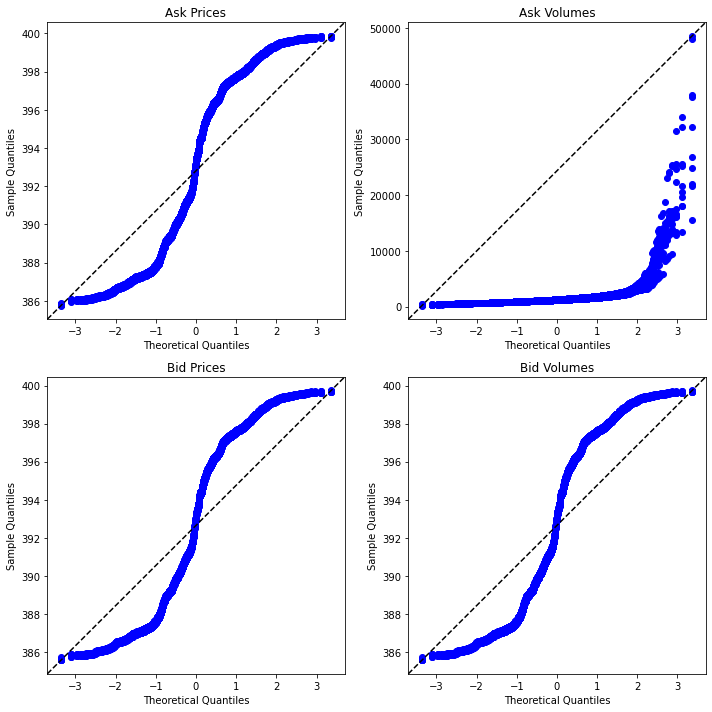

In [10]:
# Preparing to draw subgraphs
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
titles = ['Ask Prices', 'Ask Volumes', 'Bid Prices', 'Bid Volumes']
data_groups = [ask_price, ask_volume, bid_price, bid_volume]

for data1, ax, title in zip(data_groups, axes.flatten(), titles):
    # Draw Q-Q diagrams for 10 signals
    for i in range(10):
        stats.probplot(data1[:, i], dist="norm", plot=ax, fit=False)
        
    # Draw diagonal lines
    ax.plot([0, 1], [0, 1], 'k--', transform=ax.transAxes)
    
    # Set Title and Label
    ax.set_title(title)
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')


# Adjusting the spacing between subgraphs
plt.tight_layout()
plt.show()

The data points show a nonlinear pattern on the Q-Q diagram, indicating that the data does not obey the normal distribution

P-P plot

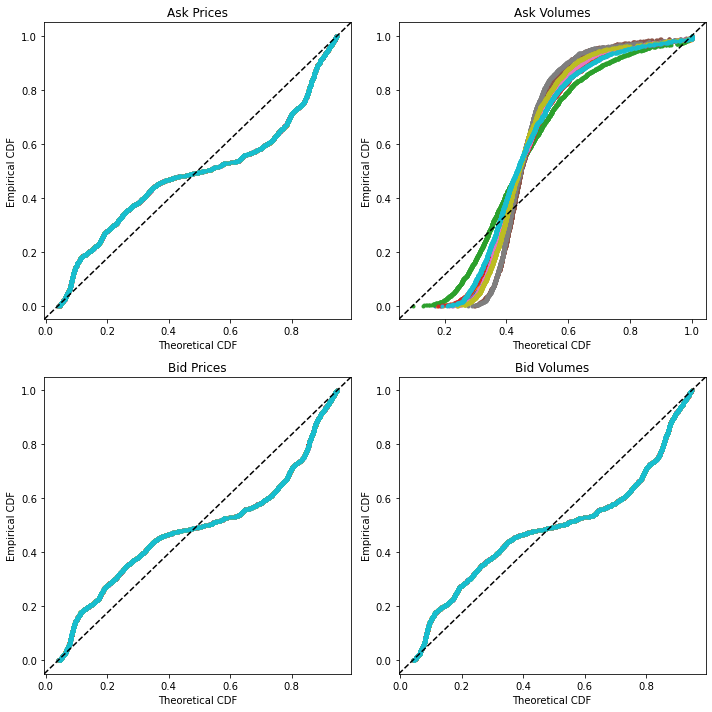

In [11]:
# Preparing to draw subgraphs
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
titles = ['Ask Prices', 'Ask Volumes', 'Bid Prices', 'Bid Volumes']
data_groups = [ask_price, ask_volume, bid_price, bid_volume]

for data1, ax, title in zip(data_groups, axes.flatten(), titles):
        
    # Draw P-P diagrams for 10 signals
    for i in range(10):
        # Standardized data
        standardized_data = (data1[:, i] - np.mean(data1[:, i])) / np.std(data1[:, i])

        # Calculate P-P diagram data
        sorted_data = np.sort(standardized_data)
        theoretical_cdf = stats.norm.cdf(sorted_data)
        empirical_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

        ax.plot(theoretical_cdf, empirical_cdf, marker='.', linestyle='none')

    # Draw diagonal lines
    ax.plot([0, 1], [0, 1], 'k--', transform=ax.transAxes)
    
    # Set Title and Label
    ax.set_title(title)
    ax.set_xlabel('Theoretical CDF')
    ax.set_ylabel('Empirical CDF')

# Adjusting the spacing between subgraphs
plt.tight_layout()
plt.show()

The data points show a nonlinear pattern on the P-P diagram, indicating that the data may not conform to the normal distribution.

The P-P diagram is sensitive to detecting skewness and tail behavior in the data.

histogram

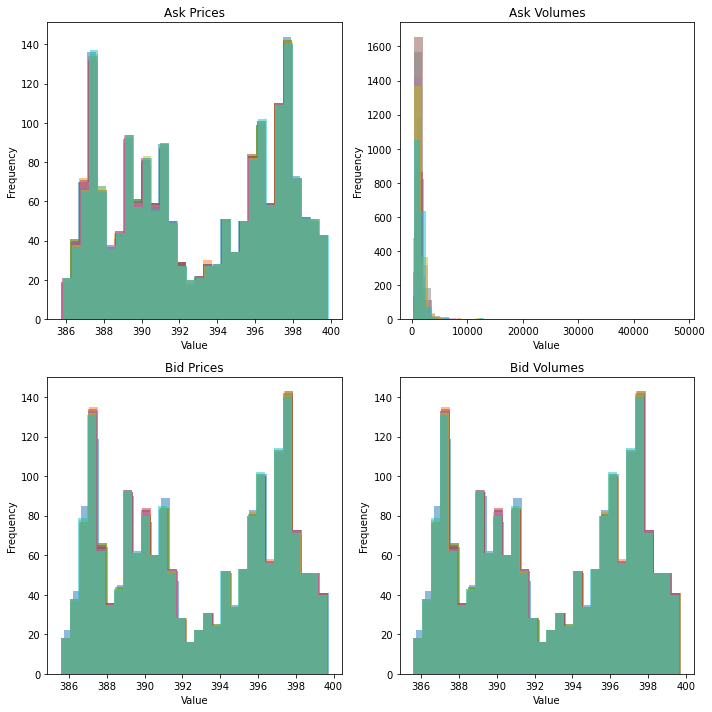

In [12]:
# Preparing to draw subgraphs
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
titles = ['Ask Prices', 'Ask Volumes', 'Bid Prices', 'Bid Volumes']
data_groups = [ask_price, ask_volume, bid_price, bid_volume]

for data, ax, title in zip(data_groups, axes.flatten(), titles):
    # Draw histograms of 10 signals
    for i in range(10):
        ax.hist(data[:, i], bins=30, alpha=0.5, histtype='stepfilled')

    # Set Title and Label
    ax.set_title(title)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjusting the spacing between subgraphs
plt.tight_layout()
plt.show()

ask, bid_ Price and bid_ The volume distribution is multimodal, and the data shows multiple peaks, indicating that the data may come from multiple different distributions or contain several subgroups.

ask_ Volume has a right long tail and is skewed to the right

### aggregate signals

Based on the preliminary statistical analysis results, it was found that the original data was not suitable for modeling using probability distribution. Therefore, the data was transformed and the return was calculated using price data. The data distribution of ask return and bid return was explored and analyzed, and modeling and prediction were conducted

In [13]:
log_returns_ask_price_data = np.log(ask_price_data / ask_price_data.shift(1))
log_returns_ask_price_data = log_returns_ask_price_data.dropna()

log_returns_bid_price_data = np.log(bid_price_data / bid_price_data.shift(1))
log_returns_bid_price_data = log_returns_bid_price_data.dropna()

log_returns_ask_price = log_returns_ask_price_data.to_numpy()
log_returns_bid_price = log_returns_bid_price_data.to_numpy()


In [14]:
ask_volume_sum = ask_volume_data.sum(axis=1)
ask_volume1 = ask_volume_sum.to_numpy()
bid_volume_sum = bid_volume_data.sum(axis=1)
bid_volume1 = bid_volume_sum.to_numpy()

In [15]:
ask_volume_data['ask_volume_sum'] = ask_volume_sum
bid_volume_data['bid_volume_sum'] = bid_volume_sum

In [16]:
ask_volume1 = ask_volume_data['ask_volume_sum'].to_numpy()
ask_volume1

array([24935, 10706, 20967, ..., 11513, 11494,  9523], dtype=int64)

In [17]:
bid_volume1 = bid_volume_data['bid_volume_sum'].to_numpy()
bid_volume1

array([3962.96, 3961.97, 3959.07, ..., 3867.03, 3867.72, 3867.46])

#### Check for outliers

In [18]:
q1 = log_returns_ask_price_data.quantile(0.25)
q3 = log_returns_ask_price_data.quantile(0.75)
iqr = q3 - q1
outliers = ((log_returns_ask_price_data < (q1 - 1.5 * iqr)) | (log_returns_ask_price_data > (q3 + 1.5 * iqr))).sum().sort_values(ascending=False)
print("Outliers:\n", outliers)

Outliers:
 Ask_Price_Level_3     19
Ask_Price_Level_4     18
Ask_Price_Level_9     18
Ask_Price_Level_10    18
Ask_Price_Level_1     17
Ask_Price_Level_2     17
Ask_Price_Level_6     17
Ask_Price_Level_7     16
Ask_Price_Level_8     16
Ask_Price_Level_5     14
dtype: int64


In [19]:
q1 = log_returns_bid_price_data.quantile(0.25)
q3 = log_returns_bid_price_data.quantile(0.75)
iqr = q3 - q1
outliers = ((log_returns_bid_price_data < (q1 - 1.5 * iqr)) | (log_returns_bid_price_data > (q3 + 1.5 * iqr))).sum().sort_values(ascending=False)
print("Outliers:\n", outliers)

Outliers:
 Bid_Price_Level_6     25
Bid_Price_Level_7     25
Bid_Price_Level_10    25
Bid_Price_Level_1     24
Bid_Price_Level_4     24
Bid_Price_Level_8     24
Bid_Price_Level_9     24
Bid_Price_Level_2     23
Bid_Price_Level_3     23
Bid_Price_Level_5     23
dtype: int64


#### descriptive statistics

In [20]:
log_returns_ask_price_data.describe()

,Ask_Price_Level_1,Ask_Price_Level_2,Ask_Price_Level_3,Ask_Price_Level_4,Ask_Price_Level_5,Ask_Price_Level_6,Ask_Price_Level_7,Ask_Price_Level_8,Ask_Price_Level_9,Ask_Price_Level_10
count,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,-0.000014,-0.000013,-0.000013,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014
std,0.000347,0.000346,0.000346,0.000347,0.000347,0.000347,0.000348,0.000348,0.000348,0.000349
min,-0.001295,-0.001243,-0.001269,-0.001269,-0.001347,-0.001321,-0.001373,-0.001373,-0.001373,-0.001373
25%,-0.000232,-0.000232,-0.000233,-0.000233,-0.000251,-0.000232,-0.000232,-0.000232,-0.000232,-0.000232
50%,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025,-0.000025
75%,0.000227,0.000227,0.000228,0.000227,0.000227,0.000227,0.000226,0.000226,0.000226,0.000226
max,0.001626,0.001652,0.001652,0.001704,0.001704,0.001704,0.001729,0.001729,0.001755,0.001755


In [21]:
log_returns_bid_price_data.describe()

,Bid_Price_Level_1,Bid_Price_Level_2,Bid_Price_Level_3,Bid_Price_Level_4,Bid_Price_Level_5,Bid_Price_Level_6,Bid_Price_Level_7,Bid_Price_Level_8,Bid_Price_Level_9,Bid_Price_Level_10
count,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014
std,0.000346,0.000344,0.000344,0.000343,0.000343,0.000342,0.000341,0.000341,0.000340,0.000340
min,-0.001228,-0.001322,-0.001296,-0.001296,-0.001296,-0.001296,-0.001296,-0.001296,-0.001296,-0.001296
25%,-0.000232,-0.000231,-0.000230,-0.000230,-0.000230,-0.000230,-0.000230,-0.000229,-0.000229,-0.000228
50%,-0.000026,-0.000025,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026
75%,0.000207,0.000207,0.000206,0.000205,0.000206,0.000205,0.000206,0.000206,0.000206,0.000205
max,0.001575,0.001549,0.001549,0.001549,0.001498,0.001498,0.001498,0.001498,0.001472,0.001472


#### Skewness and kurtosis Histogram and KDE plot

Skewness: Ask_Price_Level_1     0.050127
Ask_Price_Level_2     0.052408
Ask_Price_Level_3     0.046899
Ask_Price_Level_4     0.054758
Ask_Price_Level_5     0.051674
Ask_Price_Level_6     0.065184
Ask_Price_Level_7     0.075796
Ask_Price_Level_8     0.086163
Ask_Price_Level_9     0.095211
Ask_Price_Level_10    0.099252
dtype: float64
Kurtosis: Ask_Price_Level_1     0.339654
Ask_Price_Level_2     0.317956
Ask_Price_Level_3     0.316738
Ask_Price_Level_4     0.361277
Ask_Price_Level_5     0.393021
Ask_Price_Level_6     0.410937
Ask_Price_Level_7     0.455094
Ask_Price_Level_8     0.472323
Ask_Price_Level_9     0.509941
Ask_Price_Level_10    0.492614
dtype: float64


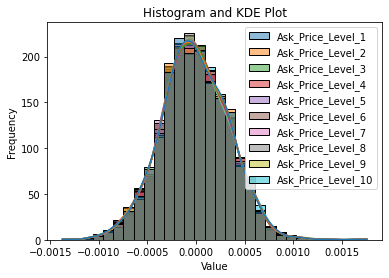

In [22]:
# Skewness and kurtosis
print(f"Skewness: {log_returns_ask_price_data.skew()}")
print(f"Kurtosis: {log_returns_ask_price_data.kurtosis()}")

# Histogram and KDE plot
sns.histplot(log_returns_ask_price_data, kde=True, bins=30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram and KDE Plot')
plt.show()


Skewness: Bid_Price_Level_1     0.070909
Bid_Price_Level_2     0.059608
Bid_Price_Level_3     0.051233
Bid_Price_Level_4     0.050491
Bid_Price_Level_5     0.049174
Bid_Price_Level_6     0.052761
Bid_Price_Level_7     0.054371
Bid_Price_Level_8     0.049586
Bid_Price_Level_9     0.046977
Bid_Price_Level_10    0.042537
dtype: float64
Kurtosis: Bid_Price_Level_1     0.372672
Bid_Price_Level_2     0.371332
Bid_Price_Level_3     0.425570
Bid_Price_Level_4     0.437979
Bid_Price_Level_5     0.400372
Bid_Price_Level_6     0.404143
Bid_Price_Level_7     0.416070
Bid_Price_Level_8     0.415387
Bid_Price_Level_9     0.426764
Bid_Price_Level_10    0.423294
dtype: float64


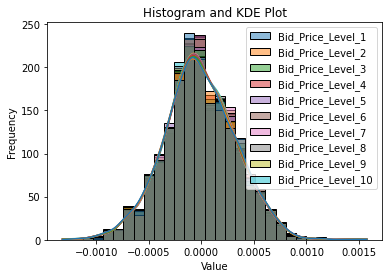

In [23]:
# Skewness and kurtosis
print(f"Skewness: {log_returns_bid_price_data.skew()}")
print(f"Kurtosis: {log_returns_bid_price_data.kurtosis()}")

# Histogram and KDE plot
sns.histplot(log_returns_bid_price_data, kde=True, bins=30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram and KDE Plot')
plt.show()

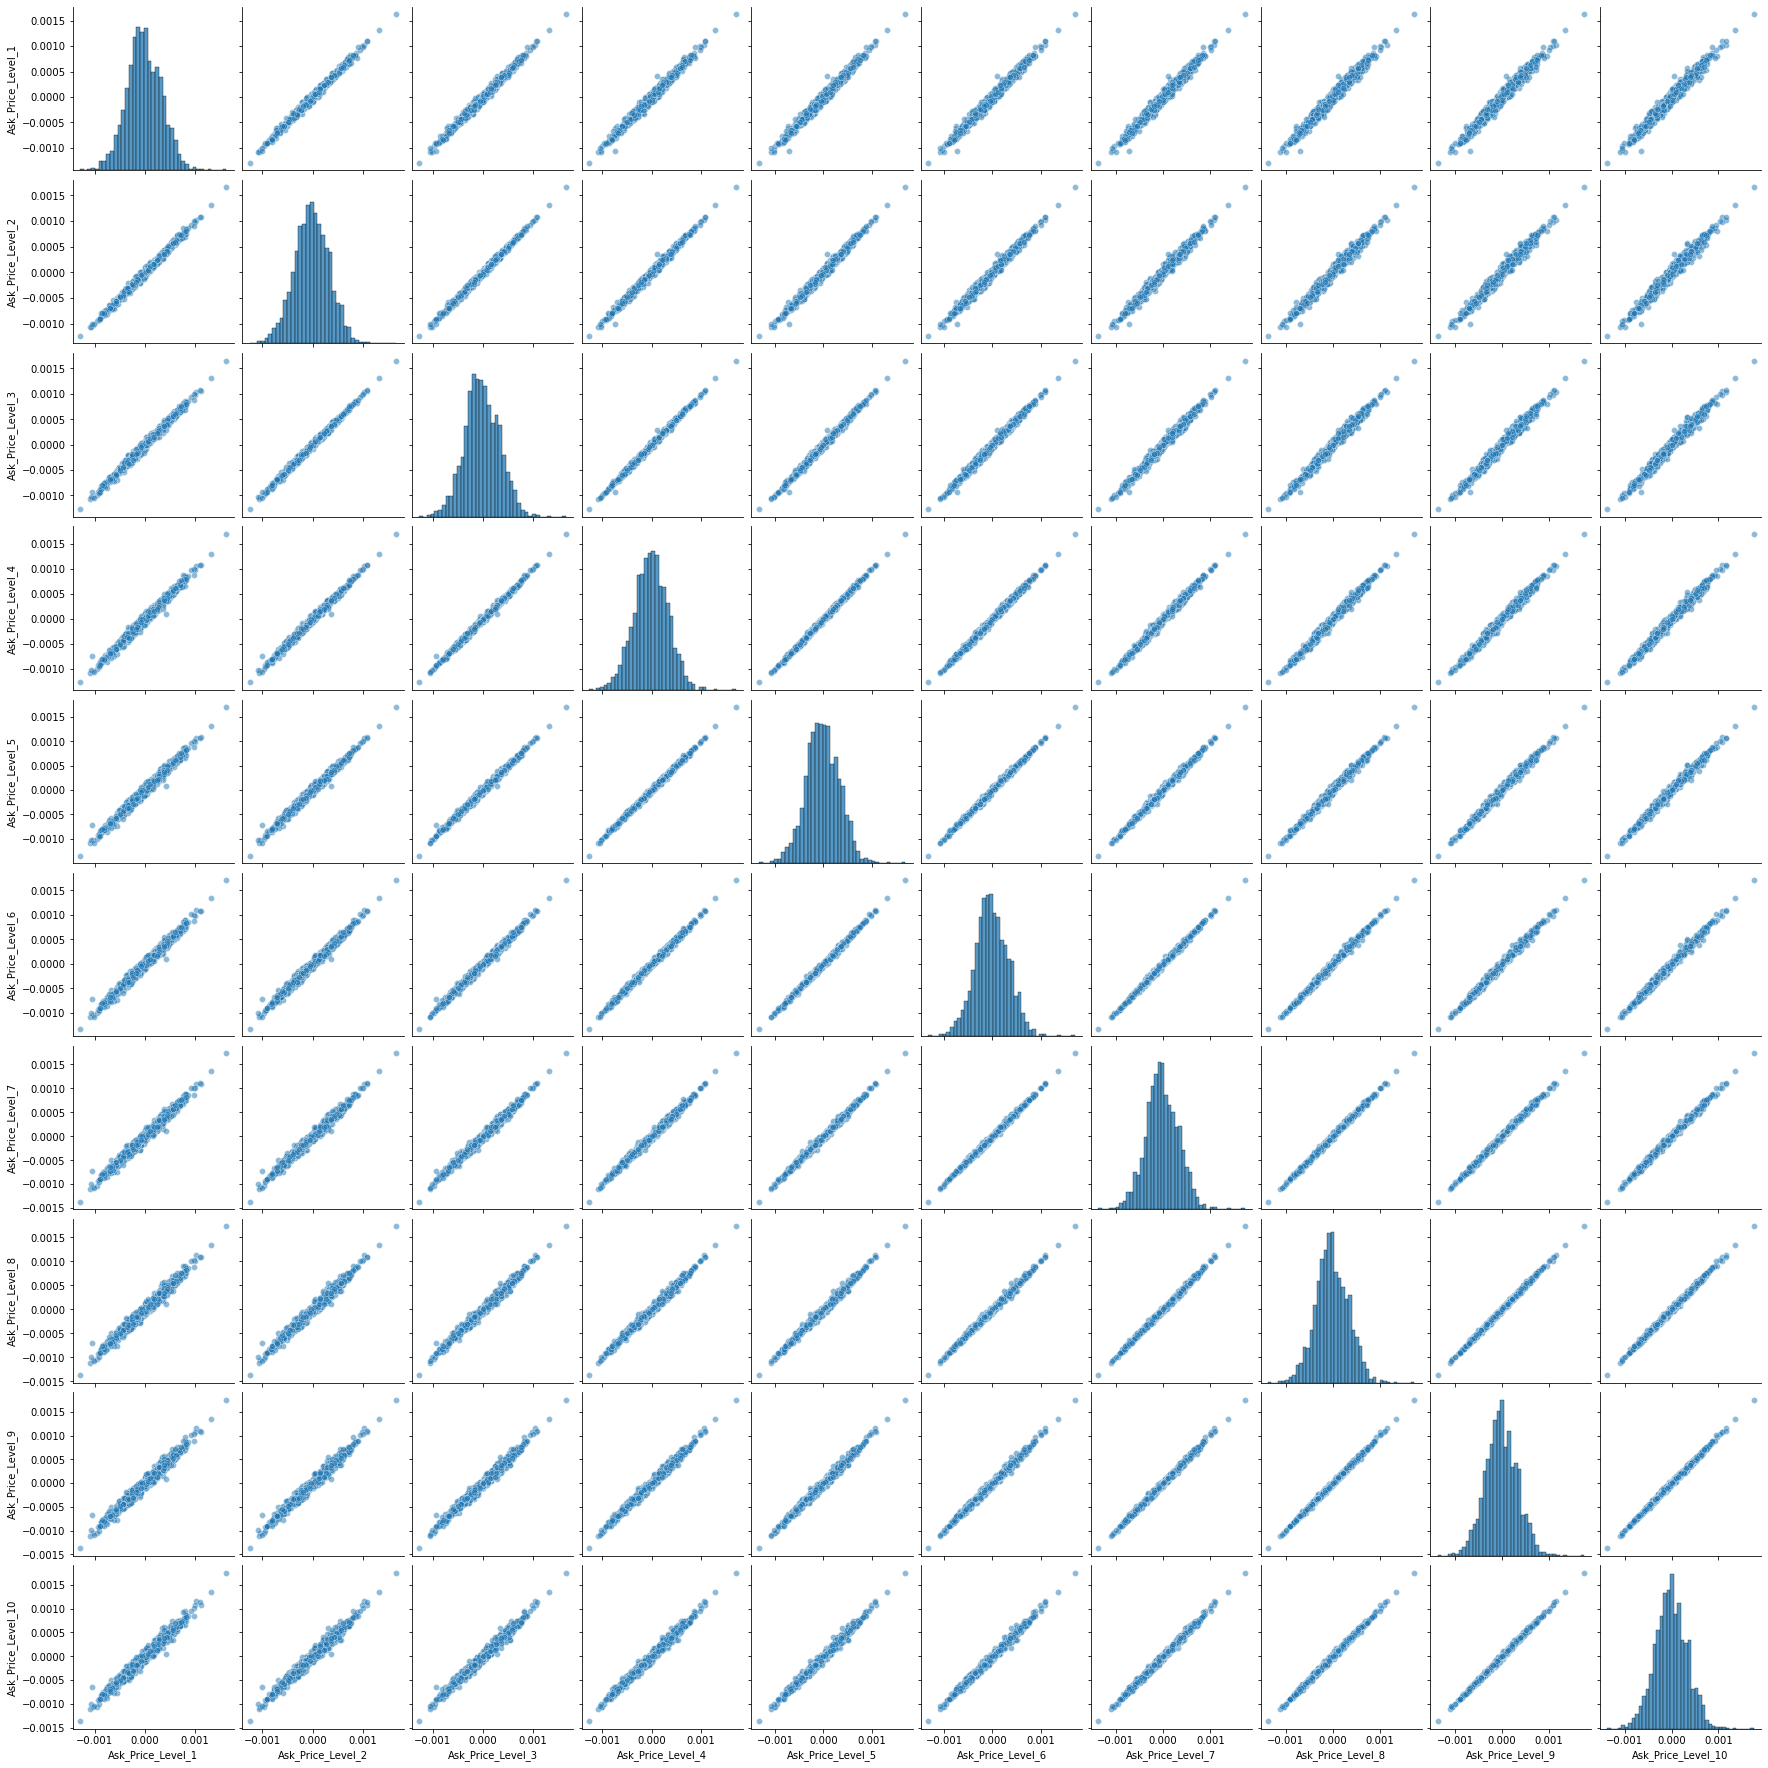

In [24]:
# Plot the pairplot
sns.pairplot(log_returns_ask_price_data, diag_kind='hist', plot_kws={'alpha': 0.5})
plt.show()

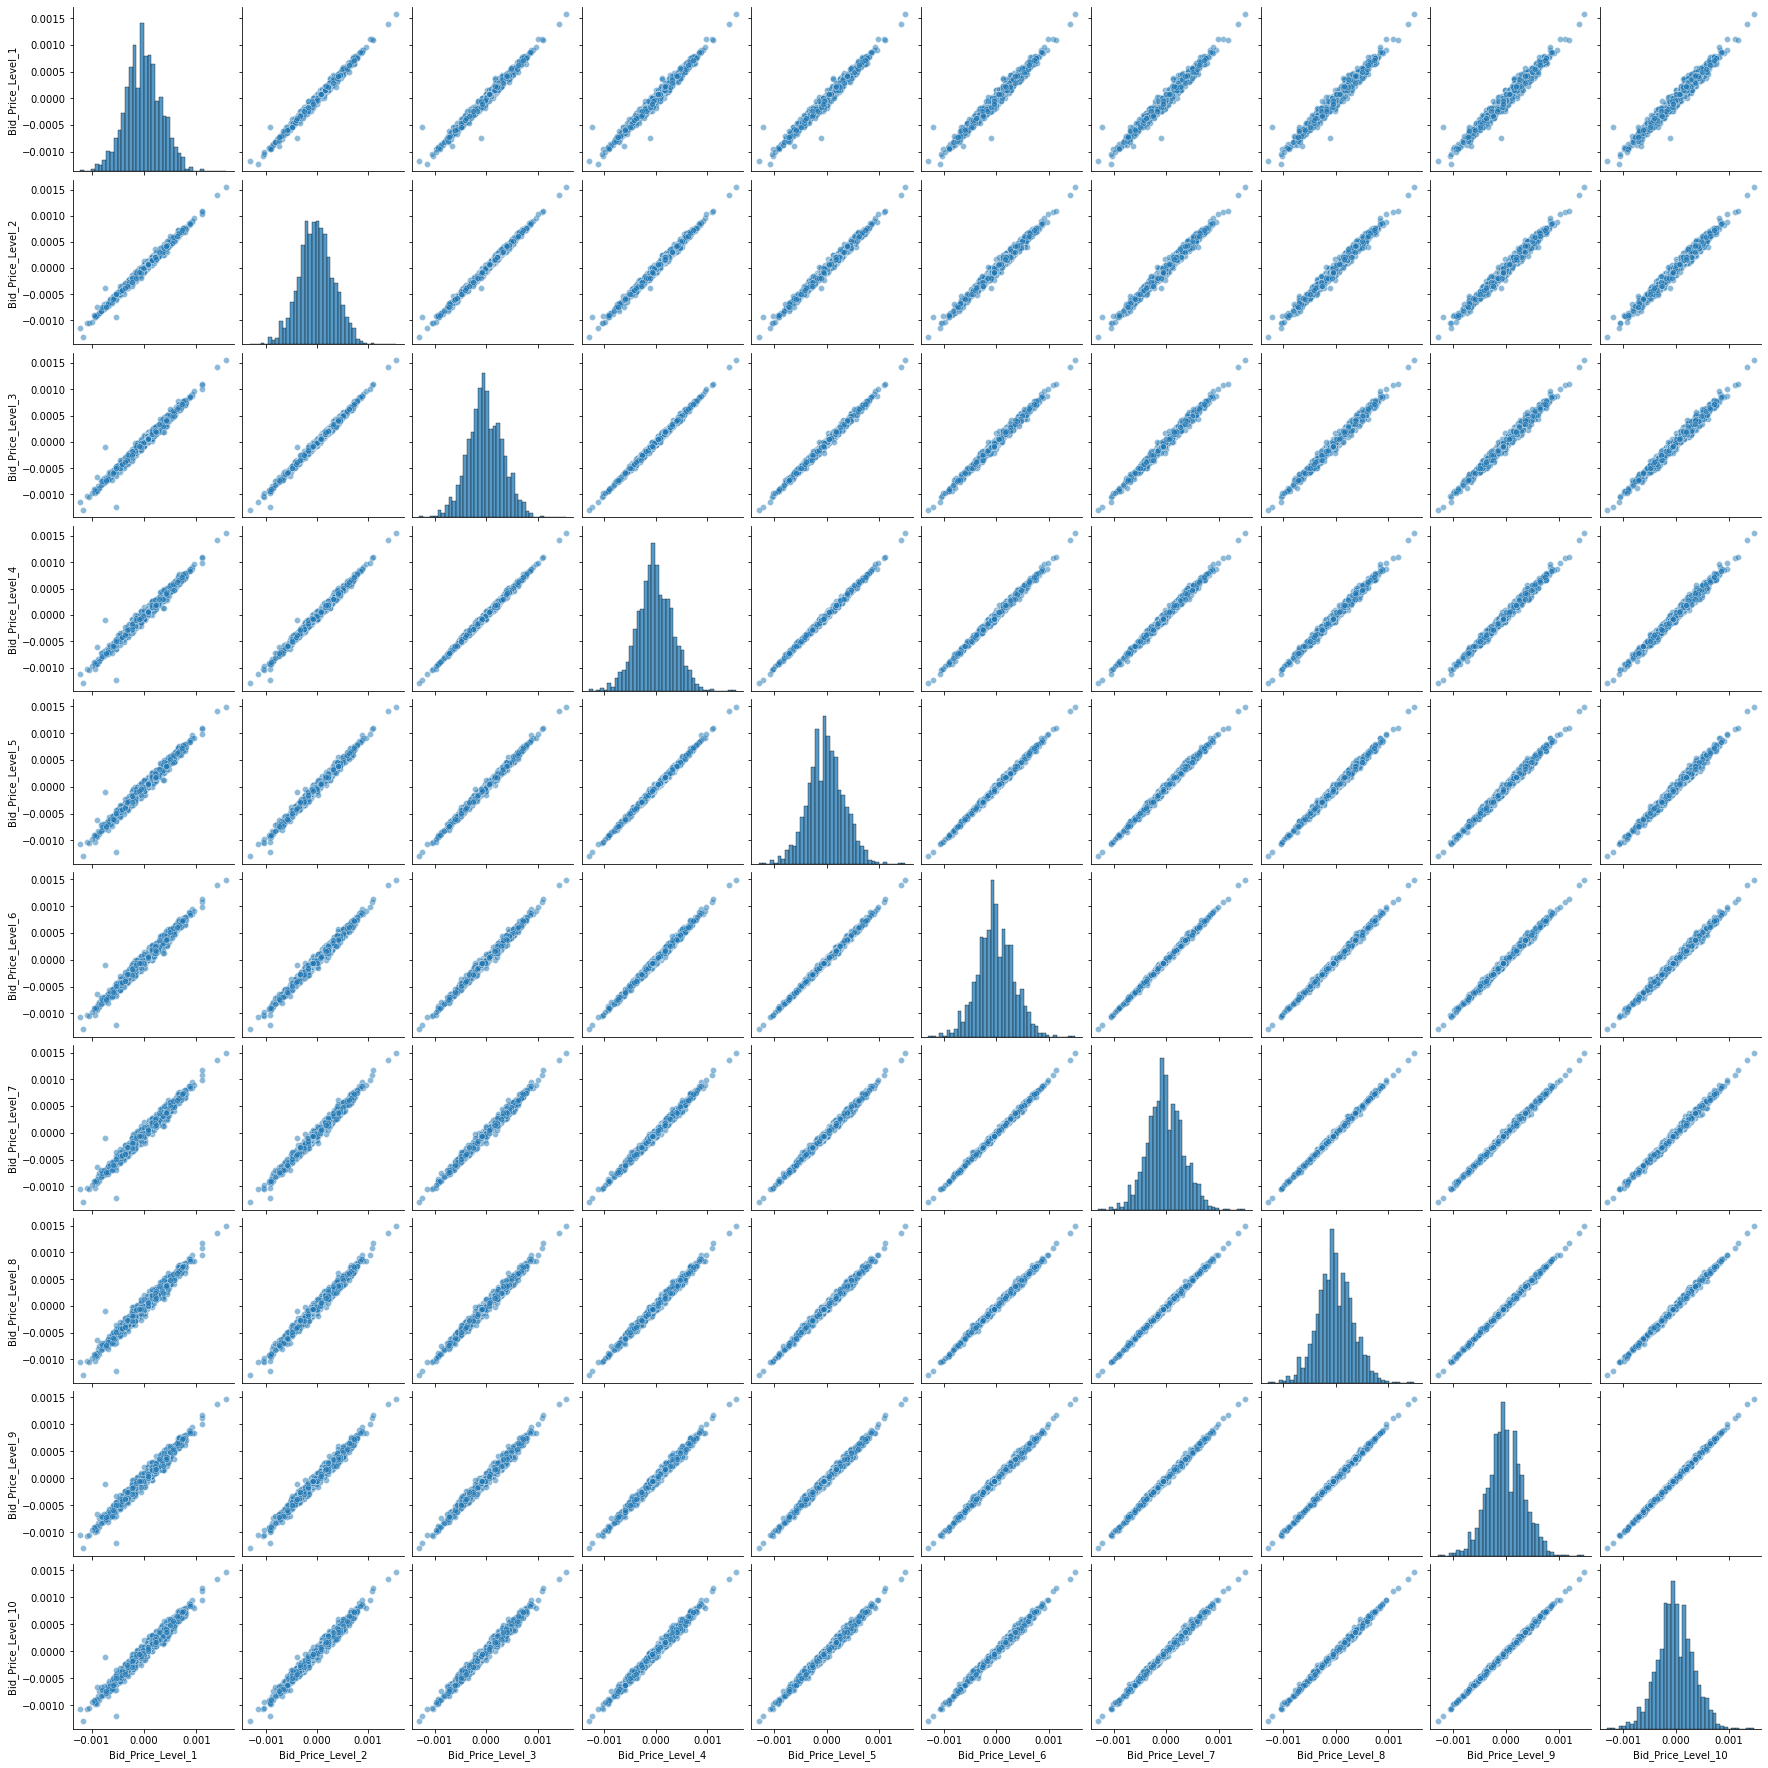

In [25]:
# Plot the pairplot
sns.pairplot(log_returns_bid_price_data, diag_kind='hist', plot_kws={'alpha': 0.5})
plt.show()

#### correlation / dependency

Pearson correlation: 0.967829543237737
Spearman correlation: 0.968242218853948
Kendall correlation: 0.8525202225023847


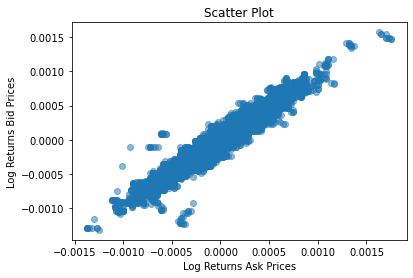

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming log_returns_ask_price and log_returns_bid_price are your data arrays
ask_prices = log_returns_ask_price.flatten()
bid_prices = log_returns_bid_price.flatten()

# Calculate correlation coefficients
pearson_corr = np.corrcoef(ask_prices, bid_prices)[0, 1]
spearman_corr = pd.Series(ask_prices).corr(pd.Series(bid_prices), method='spearman')
kendall_corr = pd.Series(ask_prices).corr(pd.Series(bid_prices), method='kendall')

print(f"Pearson correlation: {pearson_corr}")
print(f"Spearman correlation: {spearman_corr}")
print(f"Kendall correlation: {kendall_corr}")

# Scatter plot
plt.scatter(ask_prices, bid_prices, alpha=0.5)
plt.xlabel('Log Returns Ask Prices')
plt.ylabel('Log Returns Bid Prices')
plt.title('Scatter Plot')
plt.show()

Pearson correlation coefficient: measures the linear correlation between two continuous variables. When the relationship between two variables is a straight line, the Pearson correlation coefficient can capture their correlation. However, if the relationship is nonlinear, it may not be able to capture their correlation.

Spearman correlation coefficient: measures the monotonic correlation between two variables, rather than just linear correlation. The Spearman correlation coefficient is based on the rank (sorting) of the data, rather than the original value. This enables Spearman correlation coefficients to capture nonlinear relationships. When the relationship between variables is monotonic (not necessarily a straight line), the Spearman correlation coefficient can capture their correlation.

Kendall correlation coefficient: also measures the monotonic correlation between two variables. Like Spearman correlation coefficient, it is based on the rank of the data. Kendall correlation coefficient is usually used when the sample size is small, because it is more robust to outlier and non normal distribution data.

log_ returns_ ask_ Price and log_ returns_ bid_ There is a strong correlation between prices. The correlation coefficients of Pearson, Spearman, and Kendall are close to 1, indicating a significant positive correlation between the two variables.



Pearson correlation coefficients measure linear relationships, while Spearman and Kendall correlation coefficients measure rank relationships between variables. Even if their relationships are not linear, their dependencies can be captured. In this case, the correlation between the three is very high, which means that the relationship between the two may be linear, or at least in most cases very close to linear.



This strong correlation indicates that log_ returns_ ask_ Price and log_ returns_ bid_ Price may have some degree of common behavior.

#### stationarity

<AxesSubplot:>

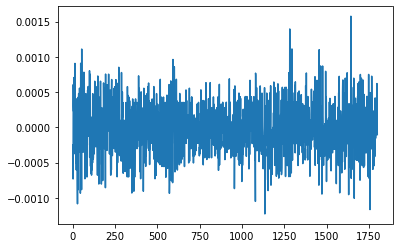

In [27]:
log_returns_bid_price_data['Bid_Price_Level_1'].plot()

In [28]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(log_returns_bid_price_data['Bid_Price_Level_1'])

# Print the results
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'  {key}: {value}')

# Interpret the results
significance_level = 0.05
if result[1] < significance_level:
    print("The null hypothesis can be rejected. The data is stationary.")
else:
    print("The null hypothesis cannot be rejected. The data is non-stationary.")

ADF Statistic: -25.101741871203615
p-value: 0.0
Critical Values:
  1%: -3.433996253313391
  5%: -2.863150617970021
  10%: -2.5676274409973163
The null hypothesis can be rejected. The data is stationary.


<AxesSubplot:>

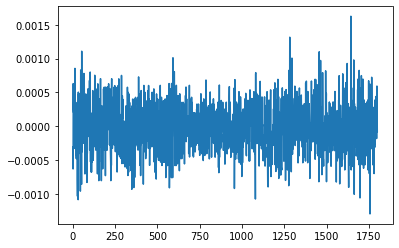

In [29]:
log_returns_ask_price_data['Ask_Price_Level_1'].plot()

In [30]:
# Perform the Augmented Dickey-Fuller test
result = adfuller(log_returns_ask_price_data['Ask_Price_Level_1'])

# Print the results
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'  {key}: {value}')

# Interpret the results
significance_level = 0.05
if result[1] < significance_level:
    print("The null hypothesis can be rejected. The data is stationary.")
else:
    print("The null hypothesis cannot be rejected. The data is non-stationary.")

ADF Statistic: -20.95911926504002
p-value: 0.0
Critical Values:
  1%: -3.4339982875683357
  5%: -2.863151515989605
  10%: -2.567627919165742
The null hypothesis can be rejected. The data is stationary.


#### causality

In [31]:
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming log_returns_ask_price and log_returns_bid_price are your data arrays
# You may need to transpose them if necessary
data = np.column_stack((log_returns_ask_price_data['Ask_Price_Level_1'], log_returns_bid_price_data['Bid_Price_Level_1']))

# Perform the Granger Causality test
max_lag = 10  # Choose the maximum lag order for the test
test_result = grangercausalitytests(data, max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3048  , p=0.0692  , df_denom=1795, df_num=1
ssr based chi2 test:   chi2=3.3103  , p=0.0688  , df=1
likelihood ratio test: chi2=3.3073  , p=0.0690  , df=1
parameter F test:         F=3.3048  , p=0.0692  , df_denom=1795, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7942  , p=0.0614  , df_denom=1792, df_num=2
ssr based chi2 test:   chi2=5.6040  , p=0.0607  , df=2
likelihood ratio test: chi2=5.5953  , p=0.0610  , df=2
parameter F test:         F=2.7942  , p=0.0614  , df_denom=1792, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.1589  , p=0.0060  , df_denom=1789, df_num=3
ssr based chi2 test:   chi2=12.5254 , p=0.0058  , df=3
likelihood ratio test: chi2=12.4819 , p=0.0059  , df=3
parameter F test:         F=4.1589  , p=0.0060  , df_denom=1789, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.0564  , p=0.

In [32]:
data = np.column_stack((log_returns_bid_price_data['Bid_Price_Level_1'], log_returns_ask_price_data['Ask_Price_Level_1']))

# Perform the Granger Causality test
max_lag = 6  # Choose the maximum lag order for the test
test_result = grangercausalitytests(data, max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.7372 , p=0.0011  , df_denom=1795, df_num=1
ssr based chi2 test:   chi2=10.7551 , p=0.0010  , df=1
likelihood ratio test: chi2=10.7231 , p=0.0011  , df=1
parameter F test:         F=10.7372 , p=0.0011  , df_denom=1795, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.0617  , p=0.0024  , df_denom=1792, df_num=2
ssr based chi2 test:   chi2=12.1573 , p=0.0023  , df=2
likelihood ratio test: chi2=12.1163 , p=0.0023  , df=2
parameter F test:         F=6.0617  , p=0.0024  , df_denom=1792, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.3918  , p=0.0044  , df_denom=1789, df_num=3
ssr based chi2 test:   chi2=13.2268 , p=0.0042  , df=3
likelihood ratio test: chi2=13.1784 , p=0.0043  , df=3
parameter F test:         F=4.3918  , p=0.0044  , df_denom=1789, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.8748  , p=0.

When the lag order is 3-6, the p-values of all test methods are much less than 0.05, so we can reject the original hypothesis at a significance level of 0.05. This means that when the lag order is 3, log_ returns_ ask_ Price vs. Log_ returns_ bid_ The prediction of price is helpful (and vice versa).

When the lag order is 1-6, the p-values of all test methods are much less than 0.05, so we can reject the original hypothesis at a significance level of 0.05. This means that when the lag order is 3, log_ returns_ bid_ Price vs. Log_ returns_ ask_ The prediction of price is helpful (and vice versa).

#### Self-similarity or long-range dependence

In [33]:
import numpy as np

def hurst_exponent(time_series):
    n = len(time_series)
    lags = range(2, n // 2)
    tau = [np.sqrt(np.mean((time_series[lag:] - time_series[:-lag]) ** 2)) for lag in lags]
    poly_fit = np.polyfit(np.log10(lags), np.log10(tau), 1)
    hurst = poly_fit[0] * 2.0
    return hurst

# Assuming log_returns_ask_price and log_returns_bid_price are your data arrays
hurst_ask = hurst_exponent(log_returns_ask_price_data['Ask_Price_Level_1'].values)
hurst_bid = hurst_exponent(log_returns_bid_price_data['Bid_Price_Level_1'].values)

print(f"Hurst exponent for log_returns_ask_price: {hurst_ask}")
print(f"Hurst exponent for log_returns_bid_price: {hurst_bid}")

Hurst exponent for log_returns_ask_price: -0.011584007523024891
Hurst exponent for log_returns_bid_price: -0.011727913484025741


According to the Hurst index results, log_ returns_ ask_ Price and log_ returns_ bid_ The Hurst indices of price are all close to 0, indicating that they may have anti mean regression properties. This means that the changes in the time series are independent, so a lower value in the time series does not mean that the next value will rise, and a higher value does not mean that the next value will decrease.



In this case, according to Hurst index results, we can conclude that these two time series may not have significant long-term dependence or self-similarity.

#### body and tail

In [34]:
def plot_pp_plot(data):
    # Sort the data
    sorted_data = np.sort(data)

    # Calculate the cumulative probabilities of the data
    n = len(sorted_data)
    cum_probs = (np.arange(1, n + 1) - 0.5) / n

    # Calculate the cumulative probabilities of the theoretical distribution (e.g., normal distribution)
    mu, std = stats.norm.fit(data)
    theoretical_probs = stats.norm.cdf(sorted_data, mu, std)

    # Plot the P-P plot
    plt.plot(theoretical_probs, cum_probs, 'o', label='Data')
    plt.plot([0, 1], [0, 1], 'k--', label='Theoretical')
    plt.xlabel('Theoretical cumulative probabilities')
    plt.ylabel('Observed cumulative probabilities')
    plt.title('P-P Plot')
    plt.legend()
    plt.show()

In [35]:
def plot_qq_plot(data):
    # Sort the data
    sorted_data = np.sort(data)

    # Calculate the quantiles of the data
    n = len(sorted_data)
    quantiles = (np.arange(1, n + 1) - 0.5) / n

    # Calculate the quantiles of the theoretical distribution (e.g., normal distribution)
    mu, std = stats.norm.fit(data)
    theoretical_quantiles = stats.norm.ppf(quantiles, mu, std)

    # Plot the Q-Q plot
    plt.plot(theoretical_quantiles, sorted_data, 'o', label='Data')
    plt.plot([min(theoretical_quantiles), max(theoretical_quantiles)], [min(sorted_data), max(sorted_data)], 'k--', label='Theoretical')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Observed quantiles')
    plt.title('Q-Q Plot')
    plt.legend()
    plt.show()


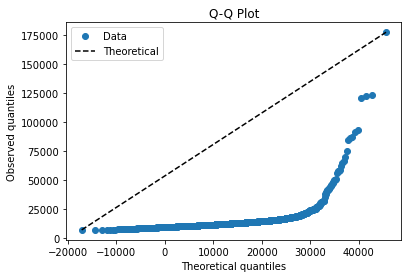

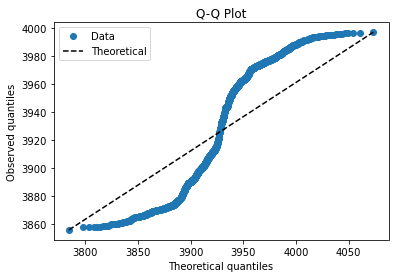

In [36]:
plot_qq_plot(ask_volume1)
plot_qq_plot(bid_volume1)

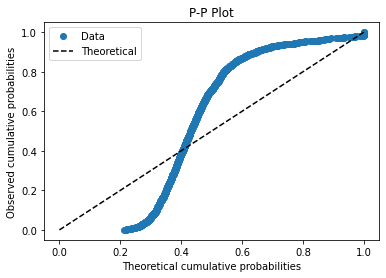

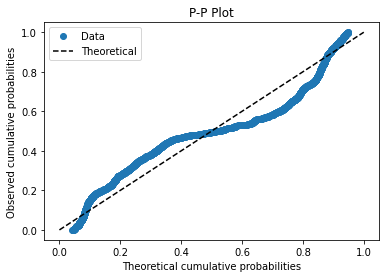

In [37]:
plot_pp_plot(ask_volume1)
plot_pp_plot(bid_volume1)

##### body of distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


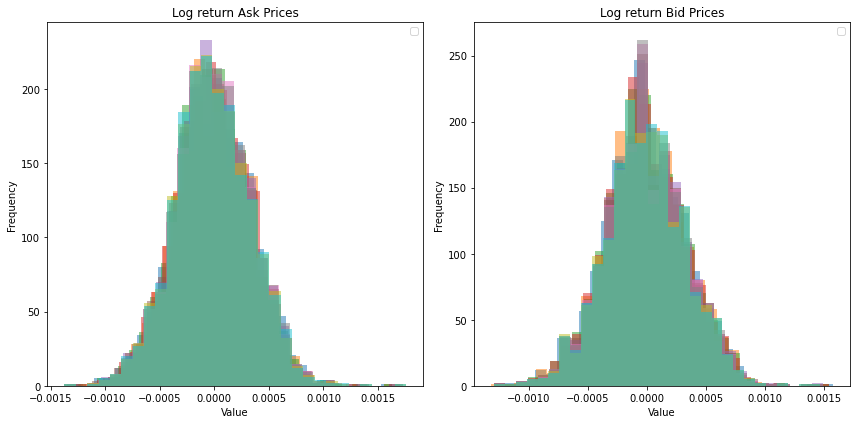

In [38]:
# Prepare to plot subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
titles = ['Log return Ask Prices', 'Log return Bid Prices']
data_groups = [log_returns_ask_price, log_returns_bid_price]

for data, ax, title in zip(data_groups, axes.flatten(), titles):
    # Prepare to draw subgraphs and draw histograms of 10 signals
    for i in range(10):
        ax.hist(data[:, i], bins=30, alpha=0.5, histtype='stepfilled')

    # Set Title and Label
    ax.set_title(title)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()

# Adjusting the spacing between subgraphs
plt.tight_layout()

plt.show()

##### tails of the distributions

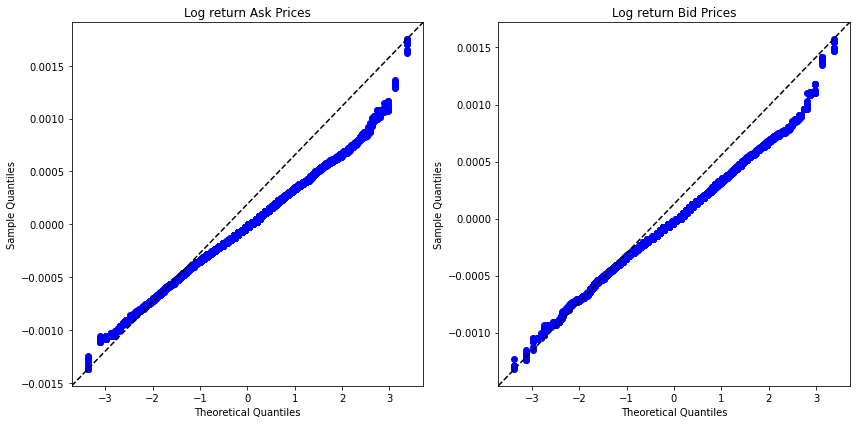

In [39]:
# Prepare to plot subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
titles = ['Log return Ask Prices', 'Log return Bid Prices']
data_groups = [log_returns_ask_price, log_returns_bid_price]

for data1, ax, title in zip(data_groups, axes.flatten(), titles):
    # Plot Q-Q plots for 10 signals
    for i in range(10):
        stats.probplot(data1[:, i], dist = stats.t(1258), plot=ax, fit=False) #stats.t(5) or stats.norm
        
    # Plot the diagonal line
    ax.plot([0, 1], [0, 1], 'k--', transform=ax.transAxes)
    
    # Set title and labels
    ax.set_title(title)
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

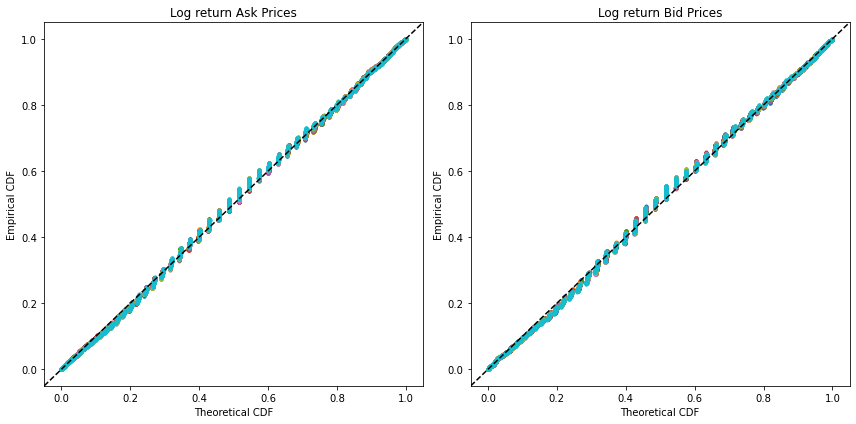

In [40]:
# Prepare to plot subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
titles = ['Log return Ask Prices', 'Log return Bid Prices']
data_groups = [log_returns_ask_price, log_returns_bid_price]

for data, ax, title in zip(data_groups, axes.flatten(), titles):
        
    # Draw P-P diagrams for 10 signals
    for i in range(10):
        # Standardized data
        standardized_data = (data[:, i] - np.mean(data[:, i])) / np.std(data[:, i])

        # Calculate P-P diagram data
        sorted_data = np.sort(standardized_data)
        theoretical_cdf = stats.norm.cdf(sorted_data)
        empirical_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

        ax.plot(theoretical_cdf, empirical_cdf, marker='.', linestyle='none')

    # Draw diagonal lines
    ax.plot([0, 1], [0, 1], 'k--', transform=ax.transAxes)
    
    # Set Title and Label
    ax.set_title(title)
    ax.set_xlabel('Theoretical CDF')
    ax.set_ylabel('Empirical CDF')

# Adjusting the spacing between subgraphs
plt.tight_layout()
plt.show()

### parametric and non-parametric modeling options

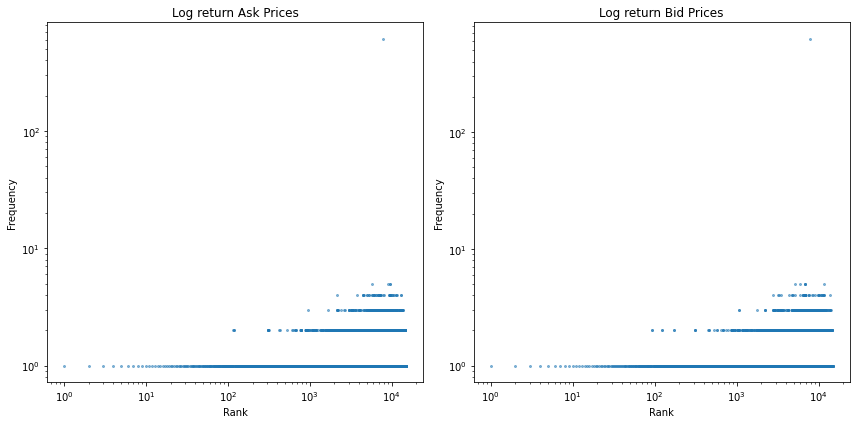

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming log_returns_ask_price and log_returns_bid_price are your data arrays
data_groups = [log_returns_ask_price, log_returns_bid_price]
titles = ['Log return Ask Prices', 'Log return Bid Prices']

# Prepare to plot subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for data, ax, title in zip(data_groups, axes.flatten(), titles):
    # Calculate frequencies and sort the data
    unique, counts = np.unique(data, return_counts=True)
    sorted_indices = np.argsort(unique)
    sorted_data = unique[sorted_indices]
    sorted_counts = counts[sorted_indices]

    # Calculate rank
    rank = np.arange(1, len(sorted_counts) + 1)

    # Plot the rank-frequency plot
    ax.plot(rank, sorted_counts, 'o', markersize=2, alpha=0.5)
    ax.set_xscale('log')
    ax.set_yscale('log')

    # Set titles and labels
    ax.set_title(title)
    ax.set_xlabel('Rank')
    ax.set_ylabel('Frequency')

# Adjust subplots spacing
plt.tight_layout()

plt.show()


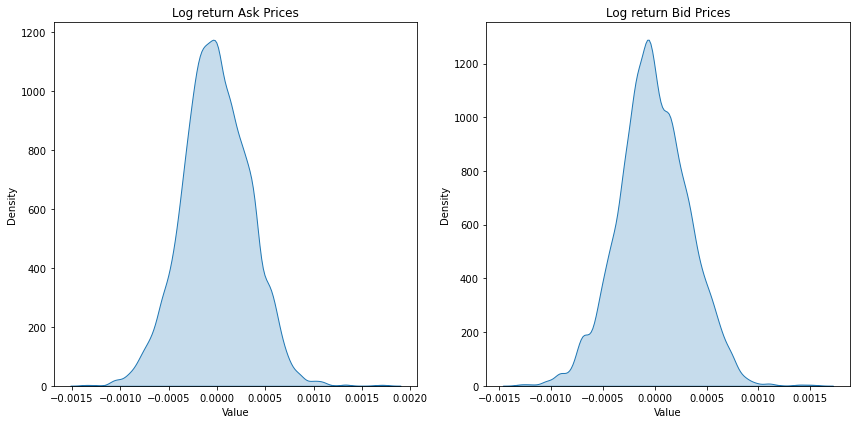

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming log_returns_ask_price and log_returns_bid_price are your data arrays
data_groups = [log_returns_ask_price, log_returns_bid_price]
titles = ['Log return Ask Prices', 'Log return Bid Prices']

# Prepare to plot subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for data, ax, title in zip(data_groups, axes.flatten(), titles):
    # Flatten the data array
    flattened_data = data.flatten()

    # Plot the KDE
    sns.kdeplot(flattened_data, ax=ax, shade=True)

    # Set titles and labels
    ax.set_title(title)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust subplots spacing
plt.tight_layout()

plt.show()


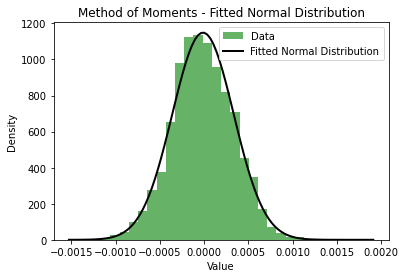

Fitted mean: -1.3508315084247496e-05
Fitted standard deviation: 0.000347151073685656


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming log_returns_ask_price is your data array
data = log_returns_ask_price.flatten()

# Method of Moments estimation
mean = np.mean(data)
std_dev = np.std(data)

# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label="Data")

# Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2, label="Fitted Normal Distribution")

# Set titles and labels
plt.title("Method of Moments - Fitted Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.show()
# Print the fitted parameters
print(f"Fitted mean: {mean}")
print(f"Fitted standard deviation: {std_dev}")


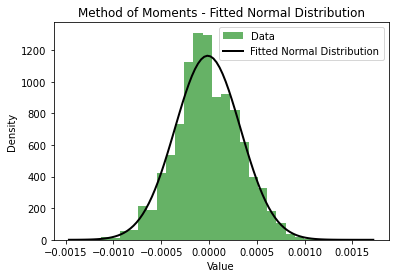

Fitted mean: -1.3559343832528282e-05
Fitted standard deviation: 0.0003425196786073877


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data = log_returns_bid_price.flatten()

# Method of Moments estimation
mean = np.mean(data)
std_dev = np.std(data)

# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label="Data")

# Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2, label="Fitted Normal Distribution")

# Set titles and labels
plt.title("Method of Moments - Fitted Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.show()
# Print the fitted parameters
print(f"Fitted mean: {mean}")
print(f"Fitted standard deviation: {std_dev}")

Use sample variance divided by the square of standard deviation (Bessel's correction) as a simple estimation method.

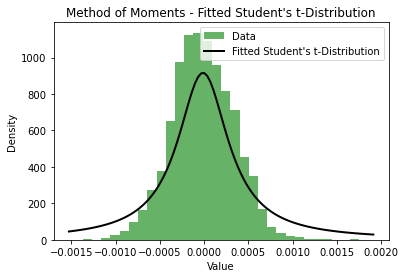

Fitted mean: -1.3508315084247496e-05
Fitted standard deviation: 0.00034716072253354445
Fitted degrees of freedom: 1.0000555895269332


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Assuming log_returns_ask_price is your data array
data = log_returns_ask_price.flatten()

# Method of Moments estimation
mean = np.mean(data)
std_dev = np.std(data, ddof=1)

# Estimate degrees of freedom
n = len(data)
degrees_of_freedom = n * (std_dev**2) / ((std_dev**2) * (n - 1))

# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label="Data")

# Plot the fitted Student's t-distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = t.pdf(x, df=degrees_of_freedom, loc=mean, scale=std_dev)
plt.plot(x, p, 'k', linewidth=2, label="Fitted Student's t-Distribution")

# Set titles and labels
plt.title("Method of Moments - Fitted Student's t-Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.show()

# Print the fitted parameters
print(f"Fitted mean: {mean}")
print(f"Fitted standard deviation: {std_dev}")
print(f"Fitted degrees of freedom: {degrees_of_freedom}")


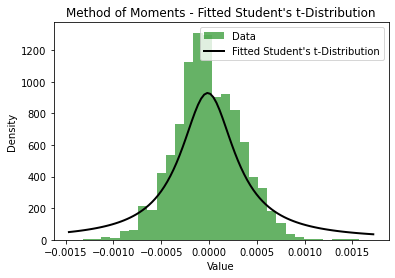

Fitted mean: -1.3559343832528282e-05
Fitted standard deviation: 0.00034252919872853433
Fitted degrees of freedom: 1.0000555895269332


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Assuming log_returns_ask_price is your data array
data = log_returns_bid_price.flatten()

# Method of Moments estimation
mean = np.mean(data)
std_dev = np.std(data, ddof=1)

# Estimate degrees of freedom
n = len(data)
degrees_of_freedom = n * (std_dev**2) / ((std_dev**2) * (n - 1))

# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label="Data")

# Plot the fitted Student's t-distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = t.pdf(x, df=degrees_of_freedom, loc=mean, scale=std_dev)
plt.plot(x, p, 'k', linewidth=2, label="Fitted Student's t-Distribution")

# Set titles and labels
plt.title("Method of Moments - Fitted Student's t-Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.show()

# Print the fitted parameters
print(f"Fitted mean: {mean}")
print(f"Fitted standard deviation: {std_dev}")
print(f"Fitted degrees of freedom: {degrees_of_freedom}")

### Modelling

univariate

In [47]:
from sklearn.model_selection import train_test_split

# Assuming log_returns_ask_price and log_returns_bid_price are your data arrays
ask_price = log_returns_ask_price.flatten()
bid_price = log_returns_bid_price.flatten()

# Combine the two data arrays into a single 2D array
data = np.column_stack((ask_price, bid_price))

# Split the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(data[:, 0], data[:, 1], test_size=0.3, random_state=42)

# Split the training set further into training and validation sets (85% training, 15% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Assuming X_train is your training data
data = X_train

# Method of Moments estimation for Normal distribution
mean = np.mean(data)
std_dev = np.std(data)

print(f"Fitted mean: {mean}")
print(f"Fitted standard deviation: {std_dev}")

from scipy.stats import norm

# Assuming X_val is your validation data, and mean and std_dev are your fitted parameters
data = X_val

# Calculate the probability density function (PDF) values for the validation data
pdf_values = norm.pdf(data, mean, std_dev)

# Evaluate the model performance
# Here, we use log-likelihood as an example
log_likelihood = np.sum(np.log(pdf_values))

print(f"Log-likelihood: {log_likelihood}")


Fitted mean: -1.3816882666432007e-05
Fitted standard deviation: 0.0003464613659798751
Log-likelihood: 12405.065422155396


In [48]:
import numpy as np
from scipy.stats import kstest, anderson, norm

# Assuming X_val is your validation data, and mean and std_dev are your fitted parameters
data = X_val

# Calculate the CDF values of the fitted normal distribution for the validation data
cdf_values = norm.cdf(data, mean, std_dev)

# Perform the Kolmogorov-Smirnov test
ks_result = kstest(data, 'norm', args=(mean, std_dev))
print("Kolmogorov-Smirnov test result:")
print("D-statistic:", ks_result.statistic)
print("P-value:", ks_result.pvalue)

# Perform the Anderson-Darling test
ad_result = anderson(data, 'norm')
print("\nAnderson-Darling test result:")
print("Test statistic:", ad_result.statistic)
print("Critical values:", ad_result.critical_values)
print("Significance levels:", ad_result.significance_level)


Kolmogorov-Smirnov test result:
D-statistic: 0.03094551096735279
P-value: 0.05256228337660429

Anderson-Darling test result:
Test statistic: 0.9266891931997634
Critical values: [0.575 0.655 0.785 0.916 1.09 ]
Significance levels: [15.  10.   5.   2.5  1. ]


Kolmogorov Smirnov test results:

D-statistic: 0.0309

P-value: 0.0526

Due to the p-value approaching 0.05, we cannot fully determine the fitting effect of the model. The p-value is slightly greater than 0.05, indicating that model fitting may be acceptable, but caution is needed.

Anderson Darling test results:

Test statistic: 0.9267

Critical values: [0.575, 0.655, 0.785, 0.916, 1.09]

Significance level: [15%, 10%, 5%, 2.5%, 1%]

The Anderson Darling test statistic (0.9267) is located between the critical values of the 5% and 2.5% significance levels (0.785 and 0.916). This indicates that at a significance level of 5%, we cannot reject the original hypothesis (i.e. the data comes from the fitted distribution), but at a significance level of 2.5%, we can reject the original hypothesis. This means that the model fitting effect may be acceptable, but caution still needs to be taken.

In summary, both testing methods indicate that the model fitting effect may be acceptable

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming log_returns_ask_price and log_returns_bid_price are your data arrays
ask_price = log_returns_ask_price.flatten()
bid_price = log_returns_bid_price.flatten()

# Combine the two data arrays into a single 2D array
data = np.column_stack((ask_price, bid_price))

# Split the data into training, validation and test sets (70% training, 15% validation, 15% testing)
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Assuming train_data is your training data
data = train_data

# Method of Moments estimation for Normal distribution
mean = np.mean(data)
std_dev = np.std(data)

print(f"Fitted mean: {mean}")
print(f"Fitted standard deviation: {std_dev}")

from scipy.stats import norm

# Assuming test_data is your test data, and mean and std_dev are your fitted parameters
data = test_data

# Calculate the probability density function (PDF) values for the test data
pdf_values = norm.pdf(data, mean, std_dev)

# Evaluate the model performance
# Here, we use log-likelihood as an example
log_likelihood = np.sum(np.log(pdf_values))

print(f"Log-likelihood: {log_likelihood}")



Fitted mean: -1.3175499254889016e-05
Fitted standard deviation: 0.0003433123303420433
Log-likelihood: 35238.51979051044


multivariate

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal

# Assuming log_returns_ask_price_data is your DataFrame with 10 signals
data = log_returns_ask_price

# Split the data into training, validation and test sets (70% training, 15% validation, 15% testing)
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Assuming train_data is your training data
data = train_data

# Method of Moments estimation for multivariate Normal distribution
mean = np.mean(data, axis=0)
cov = np.cov(data, rowvar=False)

print(f"Fitted mean: {mean}")
print(f"Fitted covariance matrix: {cov}")

# Evaluate the model performance on validation data
data = val_data
pdf_values_val = multivariate_normal.pdf(data, mean, cov)
log_likelihood_val = np.sum(np.log(pdf_values_val))
print(f"Log-likelihood on validation data: {log_likelihood_val}")

# Evaluate the model performance on test data
data = test_data
pdf_values_test = multivariate_normal.pdf(data, mean, cov)
log_likelihood_test = np.sum(np.log(pdf_values_test))
print(f"Log-likelihood on test data: {log_likelihood_test}")


Fitted mean: [-1.40670079e-05 -1.45686101e-05 -1.42241135e-05 -1.50136222e-05
 -1.47516448e-05 -1.44875221e-05 -1.46513908e-05 -1.45690369e-05
 -1.47487917e-05 -1.49904651e-05]
Fitted covariance matrix: [[1.23571210e-07 1.22658259e-07 1.22420023e-07 1.22293857e-07
  1.22228532e-07 1.22177856e-07 1.22429041e-07 1.22151772e-07
  1.22051148e-07 1.22525417e-07]
 [1.22658259e-07 1.22474582e-07 1.22220554e-07 1.22130778e-07
  1.22030486e-07 1.21952324e-07 1.22182093e-07 1.21930625e-07
  1.21824550e-07 1.22302736e-07]
 [1.22420023e-07 1.22220554e-07 1.22385332e-07 1.22306318e-07
  1.22235813e-07 1.22127073e-07 1.22364341e-07 1.22129549e-07
  1.22013690e-07 1.22511151e-07]
 [1.22293857e-07 1.22130778e-07 1.22306318e-07 1.22571052e-07
  1.22505533e-07 1.22396202e-07 1.22647487e-07 1.22417015e-07
  1.22313610e-07 1.22820400e-07]
 [1.22228532e-07 1.22030486e-07 1.22235813e-07 1.22505533e-07
  1.22692140e-07 1.22584027e-07 1.22854377e-07 1.22618106e-07
  1.22508445e-07 1.23019125e-07]
 [1.22177856

In [51]:
from scipy.stats import anderson, kstest

# 使用Fitted mean和协方差矩阵的参数生成多元正态分布
fitted_mvn = multivariate_normal(mean=mean, cov=cov)

# 对每个维度进行Anderson-Darling和Kolmogorov-Smirnov检验
for i in range(mean.shape[0]):
    sample = test_data[:, i]
    fitted_data = fitted_mvn.rvs(size=len(sample))[:, i]
    
    # Anderson-Darling test
    ad_result = anderson(sample)
    print(f"Dimension {i+1} Anderson-Darling test result:")
    print("Test statistic:", ad_result.statistic)
    print("Critical values:", ad_result.critical_values)
    print("Significance levels:", ad_result.significance_level)
    
    # Kolmogorov-Smirnov test
    ks_result = kstest(sample, 'norm', args=(mean[i], cov[i, i]))
    print(f"Dimension {i+1} Kolmogorov-Smirnov test result:")
    print("D-statistic:", ks_result.statistic)
    print("P-value:", ks_result.pvalue)
    print("\n")


Dimension 1 Anderson-Darling test result:
Test statistic: 0.31904843339702893
Critical values: [0.568 0.647 0.776 0.905 1.076]
Significance levels: [15.  10.   5.   2.5  1. ]
Dimension 1 Kolmogorov-Smirnov test result:
D-statistic: 0.5407407407407407
P-value: 1.9331154980880584e-74


Dimension 2 Anderson-Darling test result:
Test statistic: 0.2777258561256417
Critical values: [0.568 0.647 0.776 0.905 1.076]
Significance levels: [15.  10.   5.   2.5  1. ]
Dimension 2 Kolmogorov-Smirnov test result:
D-statistic: 0.537037037037037
P-value: 2.411973517137268e-73


Dimension 3 Anderson-Darling test result:
Test statistic: 0.34914327016031166
Critical values: [0.568 0.647 0.776 0.905 1.076]
Significance levels: [15.  10.   5.   2.5  1. ]
Dimension 3 Kolmogorov-Smirnov test result:
D-statistic: 0.5518518518518518
P-value: 8.599944094330548e-78


Dimension 4 Anderson-Darling test result:
Test statistic: 0.3359210408087847
Critical values: [0.568 0.647 0.776 0.905 1.076]
Significance levels: [1

The Anderson Darling test statistic for each dimension is below the corresponding critical value, which means we cannot reject the original hypothesis. However, the p value of Kolmogorov Smirnov test is very small, far lower than the commonly used significance level (such as 0.05), which indicates that we should reject the original hypothesis, that is, the data may not come from normal distribution.

In [52]:
# Number of parameters in the multivariate normal distribution
num_parameters = len(mean) + len(cov) * len(cov[0])

# Number of observations (sample size)
num_observations = len(train_data)

# Calculate AIC and BIC
aic = -2 * log_likelihood_test + 2 * num_parameters
bic = -2 * log_likelihood_test + num_parameters * np.log(num_observations)

print(f"AIC: {aic}")
print(f"BIC: {bic}")



AIC: -49871.23554969272
BIC: -49306.047515947845


In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_t

# Assuming log_returns_ask_price_data is your DataFrame with 10 signals
data = log_returns_ask_price

# Split the data into training, validation and test sets (70% training, 15% validation, 15% testing)
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Assuming train_data is your training data
data = train_data

# Method of Moments estimation for multivariate t distribution
mean = np.mean(data, axis=0)
cov = np.cov(data, rowvar=False)
# Note: you'll need to estimate the degrees of freedom (df) for the t distribution as well
# One simple way is to use the number of data points minus one
df = len(data) - 1

print(f"Fitted mean: {mean}")
print(f"Fitted covariance matrix: {cov}")
print(f"Estimated degrees of freedom: {df}")

# Evaluate the model performance on validation data
data = val_data
pdf_values_val = multivariate_t.pdf(data, mean, cov, df)
log_likelihood_val = np.sum(np.log(pdf_values_val))
print(f"Log-likelihood on validation data: {log_likelihood_val}")

# Evaluate the model performance on test data
data = test_data
pdf_values_test = multivariate_t.pdf(data, mean, cov, df)
log_likelihood_test = np.sum(np.log(pdf_values_test))
print(f"Log-likelihood on test data: {log_likelihood_test}")



Fitted mean: [-1.40670079e-05 -1.45686101e-05 -1.42241135e-05 -1.50136222e-05
 -1.47516448e-05 -1.44875221e-05 -1.46513908e-05 -1.45690369e-05
 -1.47487917e-05 -1.49904651e-05]
Fitted covariance matrix: [[1.23571210e-07 1.22658259e-07 1.22420023e-07 1.22293857e-07
  1.22228532e-07 1.22177856e-07 1.22429041e-07 1.22151772e-07
  1.22051148e-07 1.22525417e-07]
 [1.22658259e-07 1.22474582e-07 1.22220554e-07 1.22130778e-07
  1.22030486e-07 1.21952324e-07 1.22182093e-07 1.21930625e-07
  1.21824550e-07 1.22302736e-07]
 [1.22420023e-07 1.22220554e-07 1.22385332e-07 1.22306318e-07
  1.22235813e-07 1.22127073e-07 1.22364341e-07 1.22129549e-07
  1.22013690e-07 1.22511151e-07]
 [1.22293857e-07 1.22130778e-07 1.22306318e-07 1.22571052e-07
  1.22505533e-07 1.22396202e-07 1.22647487e-07 1.22417015e-07
  1.22313610e-07 1.22820400e-07]
 [1.22228532e-07 1.22030486e-07 1.22235813e-07 1.22505533e-07
  1.22692140e-07 1.22584027e-07 1.22854377e-07 1.22618106e-07
  1.22508445e-07 1.23019125e-07]
 [1.22177856

In [54]:
# Using Fitted mean and parameters of covariance matrix to generate multivariate normal distribution
fitted_mvn = multivariate_normal(mean=mean, cov=cov)

# Perform Anderson Darling and Kolmogorov Smirnov tests on each dimension
for i in range(mean.shape[0]):
    sample = test_data[:, i]
    fitted_data = fitted_mvn.rvs(size=len(sample))[:, i]
    
    # Anderson-Darling test
    ad_result = anderson(sample)
    print(f"Dimension {i+1} Anderson-Darling test result:")
    print("Test statistic:", ad_result.statistic)
    print("Critical values:", ad_result.critical_values)
    print("Significance levels:", ad_result.significance_level)
    
    # Kolmogorov-Smirnov test
    ks_result = kstest(sample, 'norm', args=(mean[i], cov[i, i]))
    print(f"Dimension {i+1} Kolmogorov-Smirnov test result:")
    print("D-statistic:", ks_result.statistic)
    print("P-value:", ks_result.pvalue)
    print("\n")


Dimension 1 Anderson-Darling test result:
Test statistic: 0.31904843339702893
Critical values: [0.568 0.647 0.776 0.905 1.076]
Significance levels: [15.  10.   5.   2.5  1. ]
Dimension 1 Kolmogorov-Smirnov test result:
D-statistic: 0.5407407407407407
P-value: 1.9331154980880584e-74


Dimension 2 Anderson-Darling test result:
Test statistic: 0.2777258561256417
Critical values: [0.568 0.647 0.776 0.905 1.076]
Significance levels: [15.  10.   5.   2.5  1. ]
Dimension 2 Kolmogorov-Smirnov test result:
D-statistic: 0.537037037037037
P-value: 2.411973517137268e-73


Dimension 3 Anderson-Darling test result:
Test statistic: 0.34914327016031166
Critical values: [0.568 0.647 0.776 0.905 1.076]
Significance levels: [15.  10.   5.   2.5  1. ]
Dimension 3 Kolmogorov-Smirnov test result:
D-statistic: 0.5518518518518518
P-value: 8.599944094330548e-78


Dimension 4 Anderson-Darling test result:
Test statistic: 0.3359210408087847
Critical values: [0.568 0.647 0.776 0.905 1.076]
Significance levels: [1

In the Anderson Darling test, we see that the test statistics for all dimensions are far below the corresponding critical values, which means that we cannot reject the hypothesis of multivariate student t-distribution on all dimensions.

In the Kolmogorov Smirnov test, the P-values of all dimensions are very small, much less than 0.05, which means that we can reject the hypothesis of multivariate student t-distribution on all dimensions.

However, considering the test results of the previous multivariate normal distribution model, the multivariate normal distribution model seems to have a worse fit than the multivariate student t-distribution model. Therefore, although these test results still have contradictions, the multivariate student t-distribution may still be a relatively more suitable choice as it provides better fitting in more dimensions.
 

In [55]:
# Number of parameters in the multivariate normal distribution
num_parameters = len(mean) + len(cov) * len(cov[0])

# Number of observations (sample size)
num_observations = len(train_data)

# Calculate AIC and BIC
aic = -2 * log_likelihood_test + 2 * num_parameters
bic = -2 * log_likelihood_test + num_parameters * np.log(num_observations)

print(f"AIC: {aic}")
print(f"BIC: {bic}")

AIC: -49881.28231857424
BIC: -49316.09428482936


In [56]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KernelDensity

# Assuming log_returns_ask_price is already calculated
data = log_returns_ask_price

# Split the data into train, validation and test sets
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Fit KDE model
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(train_data)

# Log-likelihood on validation data
log_likelihood_validation = kde.score(val_data)
print(f'Log-likelihood on validation data: {log_likelihood_validation}')

# Log-likelihood on test data
log_likelihood_test = kde.score(test_data)
print(f'Log-likelihood on test data: {log_likelihood_test}')


Log-likelihood on validation data: -1704.3930251631632
Log-likelihood on test data: -1704.3930038935196


In [57]:
import numpy as np

# Number of data points
n_train = train_data.shape[0]
n_val = val_data.shape[0]
n_test = test_data.shape[0]

# Number of model parameters (considering bandwidth as the only parameter)
k = 1

# Calculate AIC and BIC for validation data
AIC_val = -2 * log_likelihood_validation + 2 * k
BIC_val = -2 * log_likelihood_validation + k * np.log(n_val)

# Calculate AIC and BIC for test data
AIC_test = -2 * log_likelihood_test + 2 * k
BIC_test = -2 * log_likelihood_test + k * np.log(n_test)

print(f'AIC on validation data: {AIC_val}')
print(f'BIC on validation data: {BIC_val}')

print(f'AIC on test data: {AIC_test}')
print(f'BIC on test data: {BIC_test}')


AIC on validation data: 3410.7860503263264
BIC on validation data: 3414.3844722853246
AIC on test data: 3410.786007787039
BIC on test data: 3414.3844297460373
